In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
#!pip install numpy==1.23

In [163]:
#!pip install statsmodels==0.13.2

In [164]:
import warnings
warnings.filterwarnings("ignore")

In [165]:
data=pd.read_csv(r"C:\Users\Micro\Downloads\AQI\adilabad.csv")

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    84 non-null     object 
 1   AQI     84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [167]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index(data["Date"],inplace=True)
data.drop(["Date"],axis=1,inplace=True)

In [168]:
data.head()

,AQI
Date,
2016-01-01,67.0
2016-02-01,68.0
2016-03-01,71.0
2016-04-01,70.0
2016-05-01,71.0


In [169]:
original=data.copy()
data=data[:60]

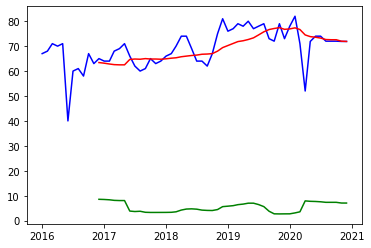

In [170]:
roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()
plt.plot(data,c='blue')
plt.plot(roll_mean,c='red')
plt.plot(roll_std,c='green')

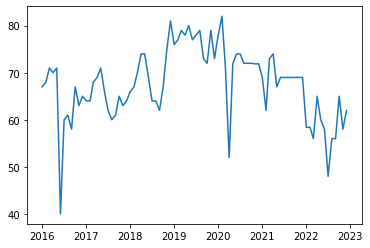

In [171]:
plt.plot(original)

In [172]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data["AQI"])
print(dftest)

(-3.9862217010196033, 0.0014844019840701092, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 292.3309055293646)


In [173]:
shift1=data.AQI-data.AQI.shift(1)
adfuller(shift1.dropna())
shift1=pd.DataFrame(shift1)

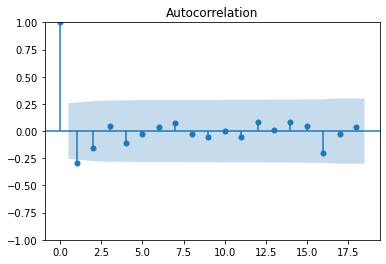

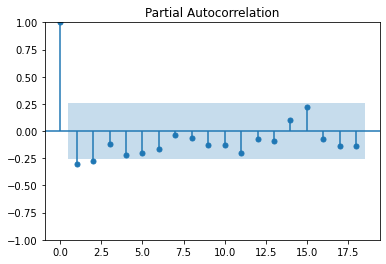

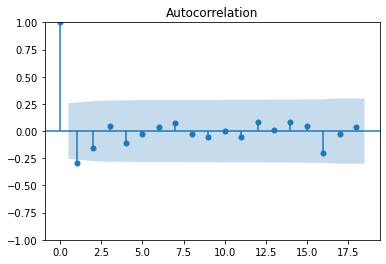

In [174]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(shift1.AQI.dropna())
plot_acf(shift1.AQI.dropna())

In [175]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(original,seasonal_order=(2,1,1,12)) 
model_fit = model.fit()

In [176]:
res=model_fit.forecast(12)
res

2023-01-01    58.758565
2023-02-01    57.000724
2023-03-01    58.389559
2023-04-01    69.201490
2023-05-01    60.914485
2023-06-01    60.037352
2023-07-01    50.362803
2023-08-01    57.901430
2023-09-01    57.581302
2023-10-01    65.192650
2023-11-01    58.816512
2023-12-01    61.156175
Freq: MS, Name: predicted_mean, dtype: float64

In [177]:
# plt.plot(original[60:],label="Actual AQI")
# plt.plot(res,label="Predicted AQI")
# plt.legend()
# plt.title("TESTING AQI-ALIHABAD")
# plt.figure(figsize=(10,5))
# plt.tight_layout()

In [178]:
# from sklearn.metrics import mean_absolute_percentage_error
# mean_absolute_percentage_error(original.AQI[60:].values,res)

In [179]:
res=pd.DataFrame(res)

In [180]:
res.to_csv(r"C:\Users\Micro\Downloads\AQI\aqipred_adilabad.csv")
#use whole data